## Exploratory Data Analysis

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

#### Roles to Explore:
#### Filter for Indian Data Engineer roles

In [2]:
df_DE_ind = df[(df['job_title_short'] == 'Data Engineer')
               & (df['job_country'] == 'India')].copy()

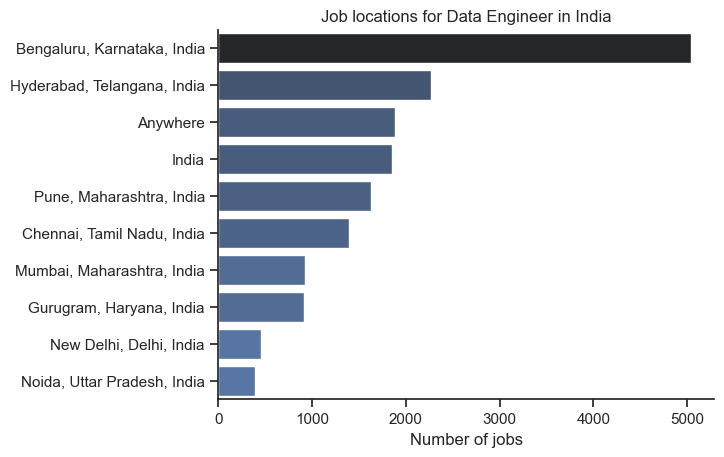

In [16]:
df_plot = df_DE_ind['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()

plt.title("Job locations for Data Engineer in India")
plt.ylabel('')
plt.xlabel("Number of jobs")
plt.show()

#### Job Opportunities:

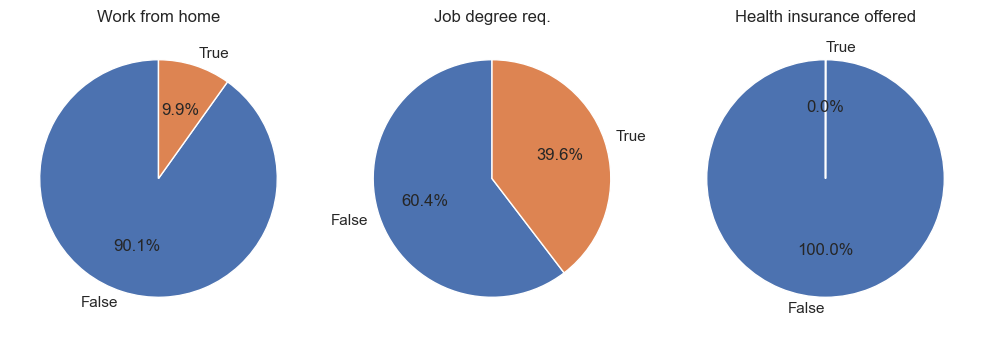

In [20]:
dict_column = {
    'job_work_from_home':'Work from home',
    'job_no_degree_mention':'Job degree req.',
    'job_health_insurance':'Health insurance offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((10,4))
for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DE_ind[column].value_counts(),autopct='%1.1f%%',startangle=90,labels=[False,True])
    ax[i].set_title(title)

fig.tight_layout()
plt.show()

#### Companies to Explore:

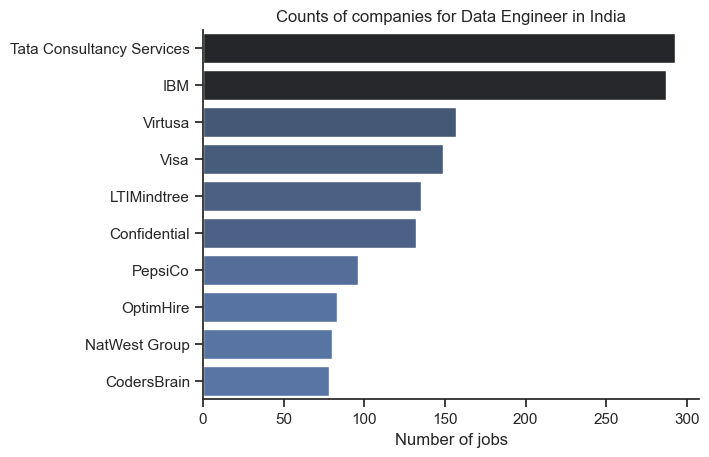

In [23]:
df_plot = df_DE_ind['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name',
            hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title("Counts of companies for Data Engineer in India")
plt.ylabel('')
plt.xlabel("Number of jobs")
plt.show()